In [44]:
import numpy as np
import pandas as pd
import math
from sklearn import svm

df_train = pd.read_csv("train.csv", nrows = 1000)
df_train['intercept'] = 1
trainingData = df_train.drop("label", axis = 1).values
trainingResults = df_train["label"].values
df_test = pd.read_csv("test.csv", nrows = 500)
df_test['intercept'] = 1

Cvals = [0.1, 0.5, 1, 5, 10, 100]

rbfSVMErrors = []
linearSVMErrors = []

for i in range(len(Cvals)):
    Cval = Cvals[i]
    # build the validation set
    start_index = i * len(trainingData)//len(Cvals)
    end_index = len(trainingData)//len(Cvals) * (i + 1)

    validation_data = trainingData[start_index:end_index]
    validation_results = trainingResults[start_index:end_index]

    # build the model
    model = np.concatenate((trainingData[:start_index], trainingData[end_index:]), axis=0)
    model_classifications = np.concatenate((trainingResults[:start_index], trainingResults[end_index:]), axis=0)
    
    svm1 = svm.SVC(C = Cval)
    svm1.fit(model, model_classifications)
    rbfScore = svm1.score(validation_data, validation_results)
    rbfSVMErrors.append(1 - rbfScore)

    svm3 = svm.LinearSVC(C = Cval)
    svm3.fit(model, model_classifications)
    linearScore = svm3.score(validation_data, validation_results)
    linearSVMErrors.append(1 - linearScore)

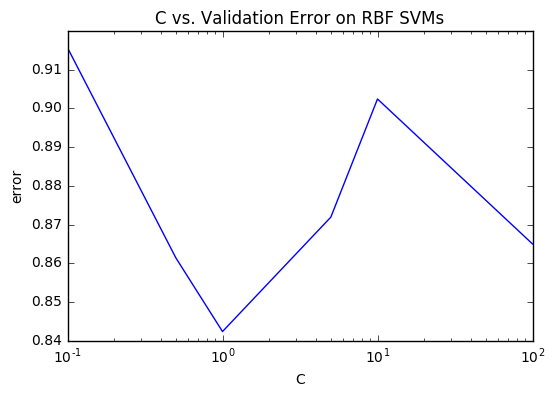

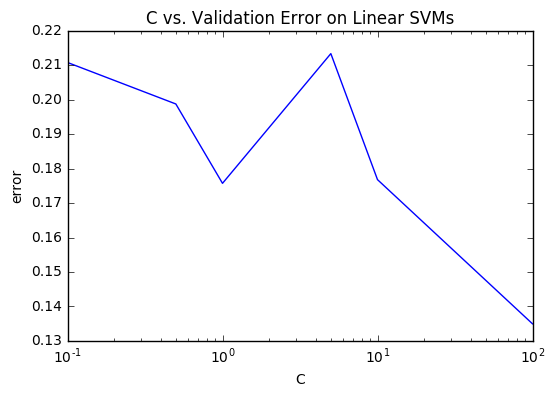

In [63]:
from matplotlib import pyplot as plt

plt.plot(Cvals, rbfSVMErrors)
plt.title("C vs. Validation Error on RBF SVMs")
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("error")
plt.savefig('rbf_svm_CvsError.png')
plt.show()

plt.plot(Cvals, linearSVMErrors)
plt.title("C vs. Validation Error on Linear SVMs")
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("error")
plt.savefig('linear_svm_CvsError.png')
plt.show()